In [ ]:
#Try to use a multiple linear regression with the same dataset, but this time use
#FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY instead of FUELCONSUMPTION_COMB. Does it result in better accuracy?
#thats the question

In [1]:
#importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [2]:
#I have to read the file first
df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


<AxesSubplot:xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

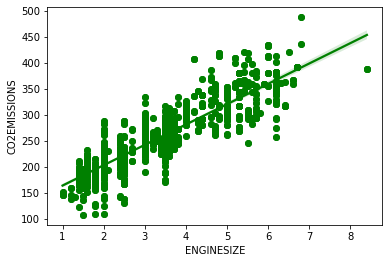

In [4]:
#parameter ENGINESIZE, CYLINDERS, FUELCONSUMPTION_HW, FUELCONSUMPTION_COMB
#target is CO2 EMISSION
#i will plot all these parameters separately first

plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS, color = "green")
#putting a regression line
sns.regplot(x= "ENGINESIZE", y = "CO2EMISSIONS", color =  "g", data = df )

<AxesSubplot:xlabel='CYLINDERS', ylabel='CO2EMISSIONS'>

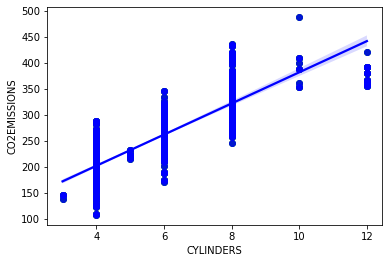

In [5]:
plt.scatter(df.CYLINDERS, df.CO2EMISSIONS, color = "green")
#putting a regression line
sns.regplot(x= "CYLINDERS", y = "CO2EMISSIONS", color =  "b", data = df )

<AxesSubplot:xlabel='FUELCONSUMPTION_HWY', ylabel='CO2EMISSIONS'>

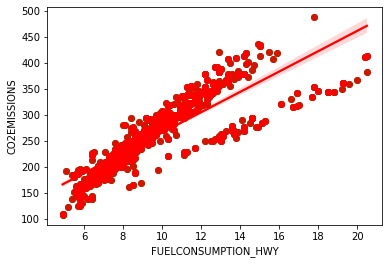

In [6]:
plt.scatter(df.FUELCONSUMPTION_HWY, df.CO2EMISSIONS, color = "green")
#putting a regression line
sns.regplot(x= "FUELCONSUMPTION_HWY", y = "CO2EMISSIONS", color =  "r", data = df )

<AxesSubplot:xlabel='FUELCONSUMPTION_COMB', ylabel='CO2EMISSIONS'>

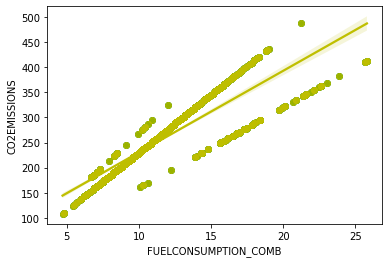

In [7]:
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS, color = "green")
#putting a regression line
sns.regplot(x= "FUELCONSUMPTION_COMB", y = "CO2EMISSIONS", color =  "y", data = df )

In [8]:
#i want to see all of this in form of heatmap
#i wanna see only these parameter that i have plotted earlier not all data set
t_df = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB"]]
t_df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
0,2.0,4,6.7,8.5
1,2.4,4,7.7,9.6
2,1.5,4,5.8,5.9
3,3.5,6,9.1,11.1
4,3.5,6,8.7,10.6


                      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_HWY  \
ENGINESIZE              1.000000   0.934011             0.778746   
CYLINDERS               0.934011   1.000000             0.724594   
FUELCONSUMPTION_HWY     0.778746   0.724594             1.000000   
FUELCONSUMPTION_COMB    0.819482   0.776788             0.985804   

                      FUELCONSUMPTION_COMB  
ENGINESIZE                        0.819482  
CYLINDERS                         0.776788  
FUELCONSUMPTION_HWY               0.985804  
FUELCONSUMPTION_COMB              1.000000  


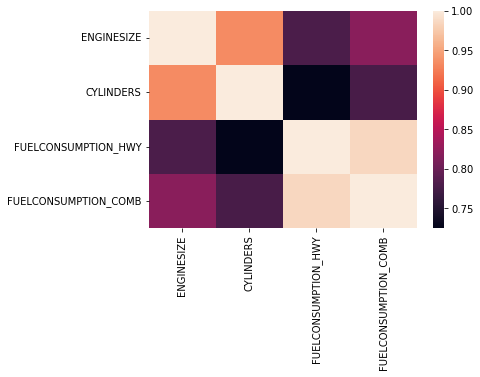

In [9]:
correlations = t_df.corr()
sns.heatmap(data = correlations)
print(correlations)

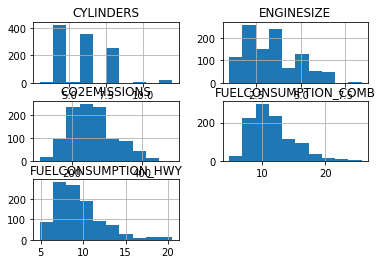

In [10]:
viz = df[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_HWY']]
viz.hist()
plt.show()

In [11]:
#Now i have accessed these things now i want to perform linear regression on it so
#lets first divide the problem in test and train data set
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

<AxesSubplot:xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

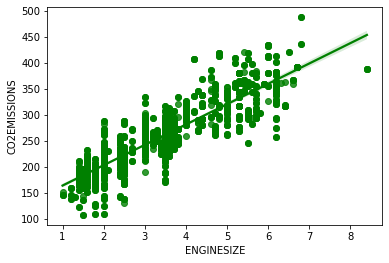

In [12]:
#Now i have to plot these data sets of train let say
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = "green")
#putting a regression line
sns.regplot(x= "ENGINESIZE", y = "CO2EMISSIONS", color =  "g", data = df )

<AxesSubplot:xlabel='CYLINDERS', ylabel='CO2EMISSIONS'>

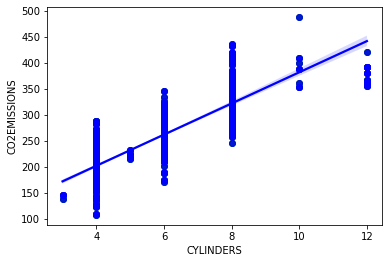

In [13]:
plt.scatter(train.CYLINDERS, train.CO2EMISSIONS, color = "green")
#putting a regression line
sns.regplot(x= "CYLINDERS", y = "CO2EMISSIONS", color =  "b", data = df )

<AxesSubplot:xlabel='FUELCONSUMPTION_HWY', ylabel='CO2EMISSIONS'>

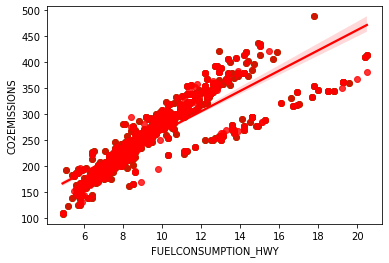

In [14]:
plt.scatter(train.FUELCONSUMPTION_HWY, train.CO2EMISSIONS, color = "green")
#putting a regression line
sns.regplot(x= "FUELCONSUMPTION_HWY", y = "CO2EMISSIONS", color =  "r", data = df )

<AxesSubplot:xlabel='FUELCONSUMPTION_COMB', ylabel='CO2EMISSIONS'>

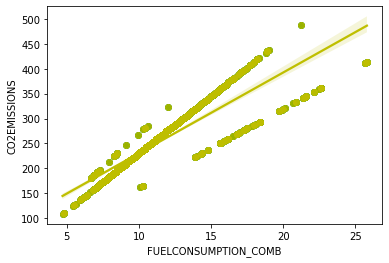

In [15]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color = "green")
#putting a regression line
sns.regplot(x= "FUELCONSUMPTION_COMB", y = "CO2EMISSIONS", color =  "y", data = train )

In [16]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(x,y)

LinearRegression()

In [17]:
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[ 7.58572727 10.26503392 10.45846239 -0.86152851]]
Intercept:  [64.84950996]


In [18]:
#now i want r2 mean_squared_error
x = np.asanyarray(train[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[["CO2EMISSIONS"]])
y_pred = regr.predict(x)
print("MSE")
print(mean_squared_error(y, y_pred))
print('Variance score: %.2f' % regr.score(x, y))
print("MAE")
print(mean_absolute_error(y, y_pred))
print(r2_score(y, y_pred))

MSE
548.9526925482802
Variance score: 0.86
MAE
16.795292471535138
0.8647815627523102


variance score of 0.86 describes that we have 86% values in our data set for accurate prediction

In [81]:
t_df.head(1)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
0,2.0,4,6.7,8.5


In [82]:
res = 66.4712 + (6.6568 *2 ) + (11.3032 *4 ) + (11.3766 *6.7 ) + (-1.8991 * 8.5)
res

185.07847

In [23]:
#predictions
predictions = regr.predict([[2.0,4,6.7,8.5]])
predictions

array([[183.82980591]])

In [22]:
data_for_pred = df[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_HWY']]
pred = regr.predict(data_for_pred)
pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[198.84717622],
       [213.59596991],
       [167.2980327 ],
       ...,
       [256.12585221],
       [253.38039205],
       [268.29270998]])

In [24]:
predd = regr.predict(x)
predd

array([[167.2980327 ],
       [254.54051545],
       [249.65589566],
       [244.24234673],
       [244.94358157],
       [256.67967509],
       [261.47814203],
       [209.58489066],
       [215.34305099],
       [247.90881459],
       [368.7386915 ],
       [368.7386915 ],
       [317.7851126 ],
       [324.33066062],
       [317.7851126 ],
       [324.33066062],
       [368.7386915 ],
       [201.38164498],
       [213.3287299 ],
       [213.3287299 ],
       [213.3287299 ],
       [206.52472333],
       [215.42042237],
       [247.74707027],
       [222.45043077],
       [250.71230328],
       [222.45043077],
       [223.49627701],
       [250.71230328],
       [288.9694172 ],
       [224.45597039],
       [217.95489114],
       [250.36769188],
       [204.78965428],
       [229.78336647],
       [311.86520795],
       [342.21877294],
       [345.41000778],
       [368.35649625],
       [342.21877294],
       [345.41000778],
       [298.35535969],
       [299.05659453],
       [290

In [25]:
train

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


I am doing some predictions above from training data set test data set and from actual data set
and comparing the values
I am also doing predictions on already existing values and then comparing them with actual values in data set

In [83]:
df["CO2EMISSIONS"]

0       196
1       221
2       136
3       255
4       244
       ... 
1062    271
1063    264
1064    271
1065    260
1066    294
Name: CO2EMISSIONS, Length: 1067, dtype: int64